## Reasearch question: 
#### How do factors such as weather, avocado sales, avocado price, region, and date, relate to each other? Which of these factors leads to increased revenue for Avocando?

## overview
#### I will be using the columns "Date", "AveragePrice", "Total.Volume", "year", and "region" of the avocado dataset to answer my research question above. I will make a scatterplot showing the correlation between the avocado price and avocado volume in 2015, bar plot of avocado total sales volume for month in San Diego and Boston, a map showing the avocado sales per capita of each city on U.S. map, and a time series plot showing the revenue of Boston over the years compared to inflation.

In [20]:
# importing library and data
library(tidyverse)
avocado = read.csv(file = '/kaggle/input/avacado-price-prediction/Avocado.csv', header = T)

In [21]:
# Data cleaning
# filter out regions that are not cities
avocado <- avocado %>% filter(!(region %in% c("TotalUS", "Northeast", "SouthCentral", "Southeast", "West", "Midsouth")))

# eliminate irrelevant columns
avocado <- avocado[, c("Date", "AveragePrice", "Total.Volume", "year", "region")]

# new dataset that shows the average price of avocado by month for California
avocado_month_SD <- avocado %>% 
  filter(region == "SanDiego") %>% 
  mutate(month = as.numeric(substr(Date, 6, 7))) %>% 
  group_by(month, region) %>%
   summarise(avg_price = mean(AveragePrice), vol.per.month=sum(Total.Volume)) 

# new dataset that shows the average price of avocado by month for New York
avocado_month_B <- avocado %>% 
  filter(region == "Boston") %>% 
  mutate(month = as.numeric(substr(Date, 6, 7))) %>% 
  group_by(month, region) %>%
   summarise(avg_price = mean(AveragePrice), vol.per.month=sum(Total.Volume)) 

# new dataset that shows the avocado price and volume for each city 
avocado_2015 <- avocado %>% 
  mutate(month = as.numeric(substr(Date, 6, 7))) %>% 
  filter(year == 2015) %>% 
   group_by(month, region) %>%
   summarise(avg_price = mean(AveragePrice), vol.per.month=sum(Total.Volume),  revenue=sum(Total.Volume)*mean(AveragePrice)) %>%
   filter(region != "California")

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


# plot 1
## scatterplot showing the correlation between the avocado price and avocado volume in 2015 for each city seperating the low to middle sales volume cities and the high volume cities.

`geom_smooth()` using formula = 'y ~ x'


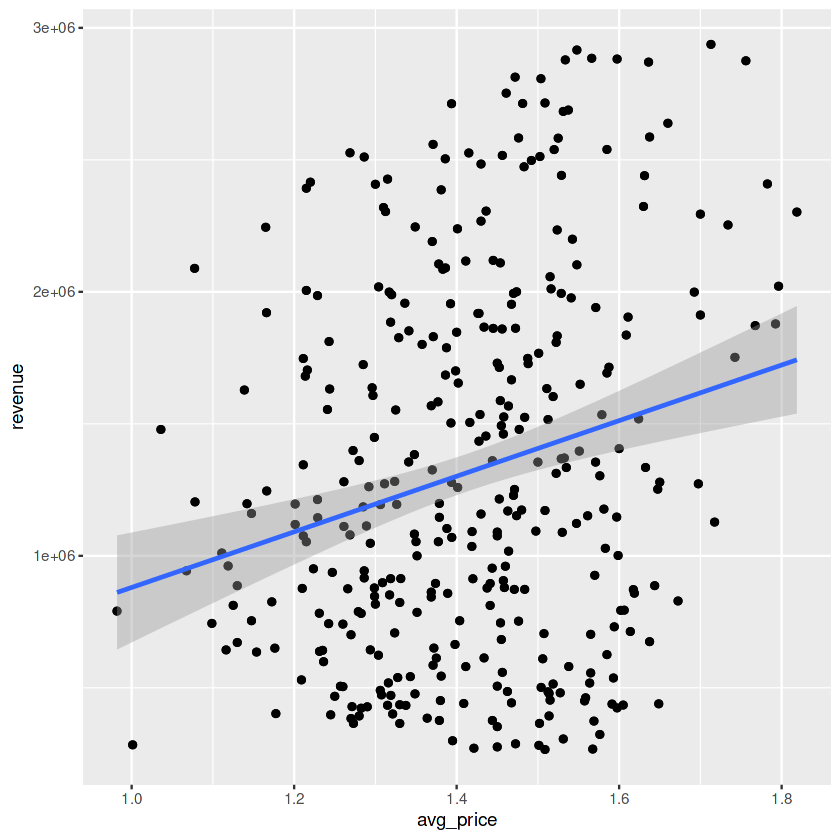

In [22]:

# scatter plot for avocado price and avocado volume for low to middle sales volume cities
scatter = ggplot(avocado_2015 %>% filter(vol.per.month < 2000000), aes(x = avg_price, y = revenue)) +
  geom_point(size = 1) +
    geom_point() + 
  geom_jitter() +
  geom_smooth(method = "lm")
scatter


`geom_smooth()` using formula = 'y ~ x'


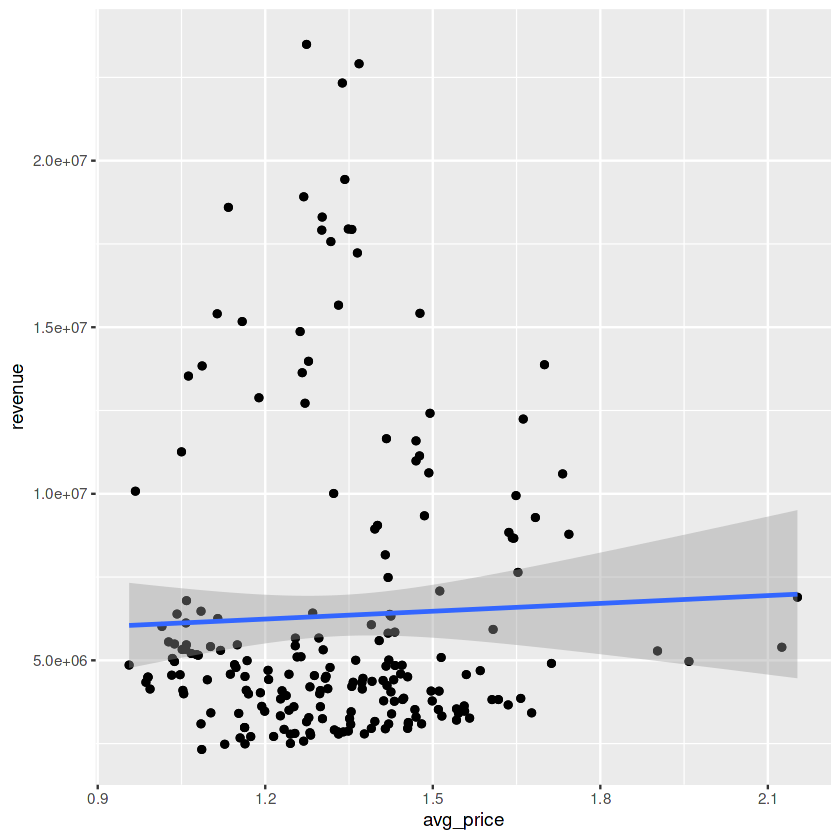

In [23]:

# scatter plot for avocado price and avocado volume for high sales volume cities
scatter = ggplot(avocado_2015 %>% filter(vol.per.month > 2000000), aes(x = avg_price, y = revenue)) +
  geom_point(size = 1) +
    geom_point() + 
  geom_jitter() +
  geom_smooth(method = "lm")
scatter


#### interpretation: We can see from our scatterplots above that in cities with less sales volume usually cities with less population, their is a correlation between price and monthly revenue With this information it may be beneficial for avocando to investigate in potentially increaseing their avocado prices in cities with less sales volume. We can see that their is no correlation between price and revenue for avocados in cities with larger sales volumes.

# plot 2
## bar plot of avocado total sales volume for month in San Diego and Boston.

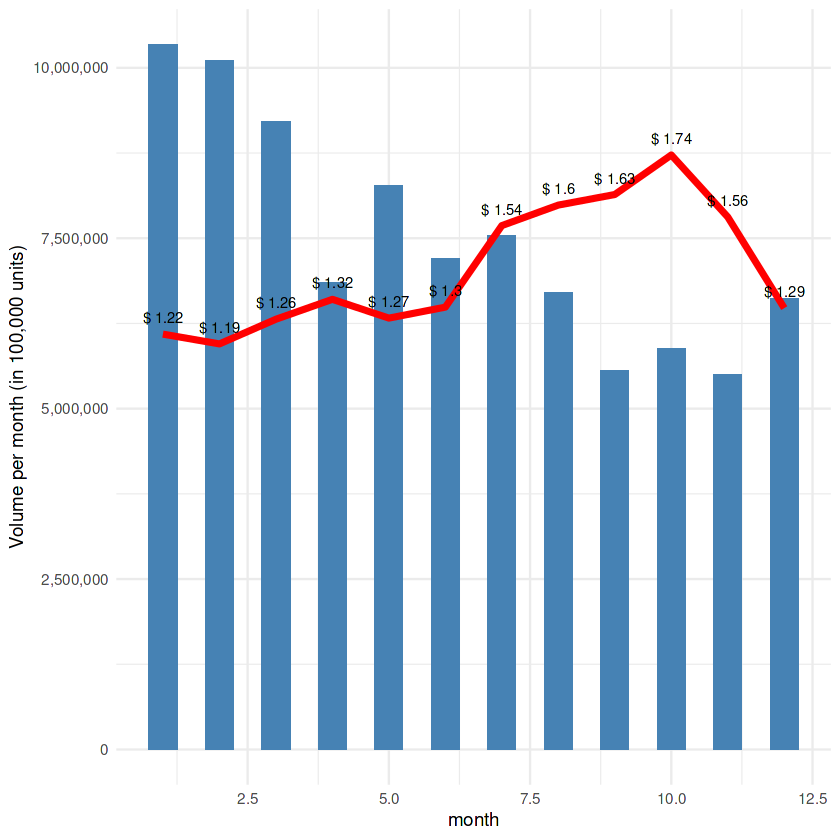

In [24]:

# San Diego bar chart
bar_chart = ggplot(data = avocado_month_SD, aes(x = month)) +
  geom_bar(aes(y = vol.per.month), stat = "identity", width = 0.5, fill = "steelblue") +
  geom_line(aes(y = avg_price * 5000000), color = "red", size = 1.5) +
  geom_text(aes(y = avg_price * 5000000, label = paste("$", round(avg_price, 2))), vjust = -1, size = 3) +
  theme_minimal() +
  ylab("Volume per month (in 100,000 units)") +
  scale_y_continuous(labels = scales::comma)

bar_chart


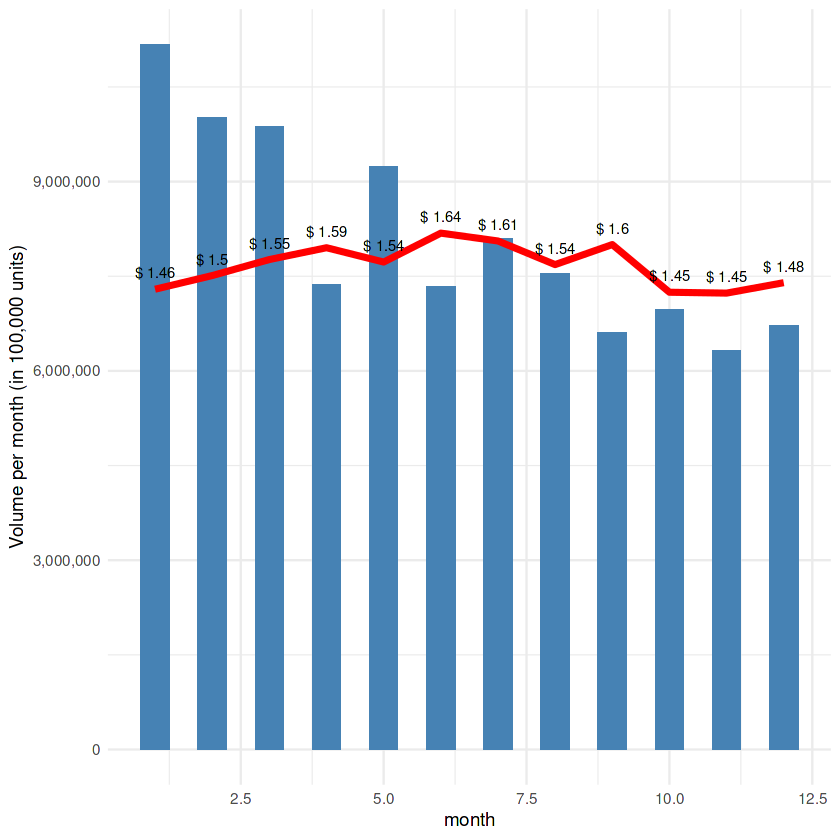

In [25]:

# Boston bar chart
bar_chart = ggplot(data = avocado_month_B, aes(x = month)) +
  geom_bar(aes(y = vol.per.month), stat = "identity", width = 0.5, fill = "steelblue") +
  geom_line(aes(y = avg_price * 5000000), color = "red", size = 1.5) +
  geom_text(aes(y = avg_price * 5000000, label = paste("$", round(avg_price, 2))), vjust = -1, size = 3) +
  theme_minimal() +
  ylab("Volume per month (in 100,000 units)") +
  scale_y_continuous(labels = scales::comma)

bar_chart


#### interpretation: We can see from the graphs that buying patterns in San Diego and Boston are a bit different. It appears that people in San Diego are more sensitive to price changes, although we can't deduct from these graphs how much of the change in volume in both cities is due to price changes or how much of the price changes is due to changes in volume. It may be beneficial for Avoando to research more into the relationship between avocado price and sales volume. 

# plot 3
## map showing the avocado sales per capita of each city on U.S. map.

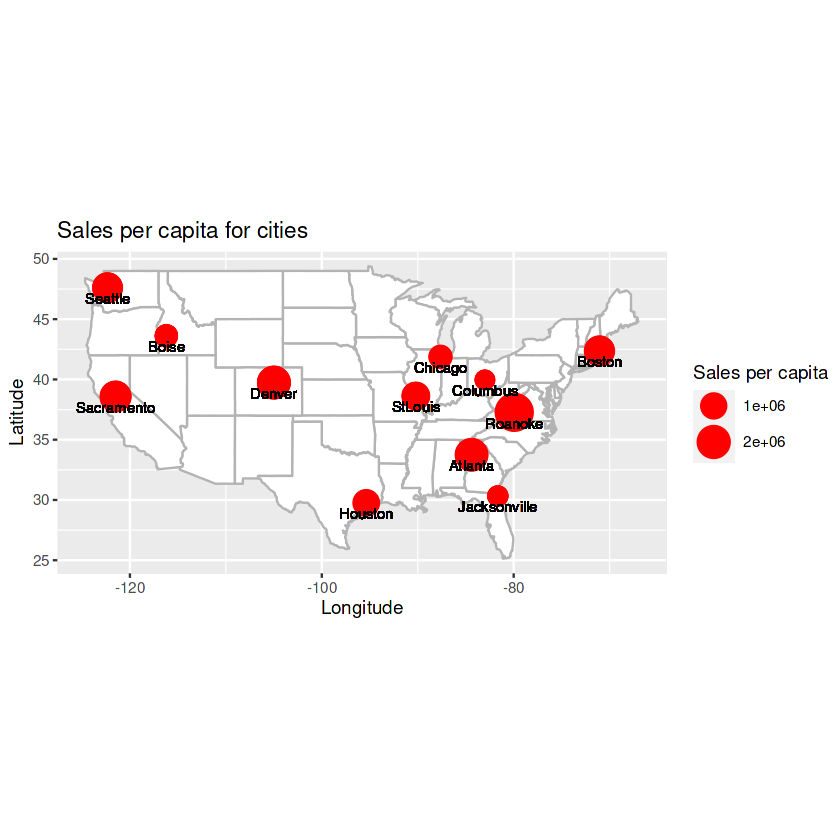

In [26]:

# Add latitude and longitude to data
avocado_map <- avocado %>% 
  mutate(
    lon = case_when(
      region == "Houston" ~ -95.3698,
      region == "Atlanta" ~ -84.39,
      region == "Chicago" ~ -87.6298,
      region == "Denver" ~ -104.9903,
      region == "Seattle" ~ -122.3321,
      region == "Boston" ~ -71.0589,
      region == "Jacksonville" ~ -81.6557,
      region == "Sacramento" ~ -121.4944,
      region == "Roanoke" ~ -79.9414,
      region == "StLouis" ~ -90.1994,
      region == "Boise" ~ -116.2023,
      region == "Columbus" ~ -82.9988,
      TRUE ~ NA_real_
    ),
    lat = case_when(
      region == "Houston" ~ 29.7604,
      region == "Atlanta" ~ 33.7490,
      region == "Chicago" ~ 41.8781,
      region == "Denver" ~ 39.7392,
      region == "Seattle" ~ 47.6062,
      region == "Boston" ~ 42.3601,
      region == "Jacksonville" ~ 30.3322,
      region == "Sacramento" ~ 38.5816,
      region == "Roanoke" ~ 37.2709,
      region == "StLouis" ~ 38.6270,
      region == "Boise" ~ 43.6150,
      region == "Columbus" ~ 39.9612,
      TRUE ~ NA_real_
    ),
    pop = case_when(
      region == "Houston" ~ 2.288,
      region == "Atlanta" ~ 0.496,
      region == "Chicago" ~ 2.697,
      region == "Denver" ~ 0.711,
      region == "Seattle" ~ 0.733,
      region == "Boston" ~ 0.654,
      region == "Jacksonville" ~ 0.954,
      region == "Sacramento" ~ 0.525,
      region == "Roanoke" ~ 0.098,
      region == "StLouis" ~ 0.293,
      region == "Boise" ~ 0.237,
      region == "Columbus" ~ 0.906,
      TRUE ~ NA_real_
    )
  )


#plot the map of the US
us_map <- ggplot() +
  borders("state", colour = "gray70", size = 0.5, fill = "white") +
  coord_quickmap()

# add points to the map
us_map +
  geom_point(data = avocado_map, aes(x = lon, y = lat, size = Total.Volume/pop), color = "red") +
  geom_text(data = avocado_map, aes(x = lon, y = lat, label = region), hjust = 0.5, vjust = 1.5, size = 3) +
  labs(x = "Longitude", y = "Latitude", title = "Sales per capita for cities") +
  scale_size(name = "Sales per capita", range = c(2, 10))


#### interpretation: This map can show us the level of penetration Avocando has in each city. Cities with larger points show more sales per person, indicating more of its market share is being used. Some cities with smaller sales per capita like jacksonville may be worth investigating to see if they are some areas in Jacksonville that aren't maximizing their potential market share.

# plot 4
## time series plot showing the revenue of Boston over the years compared to inflation.

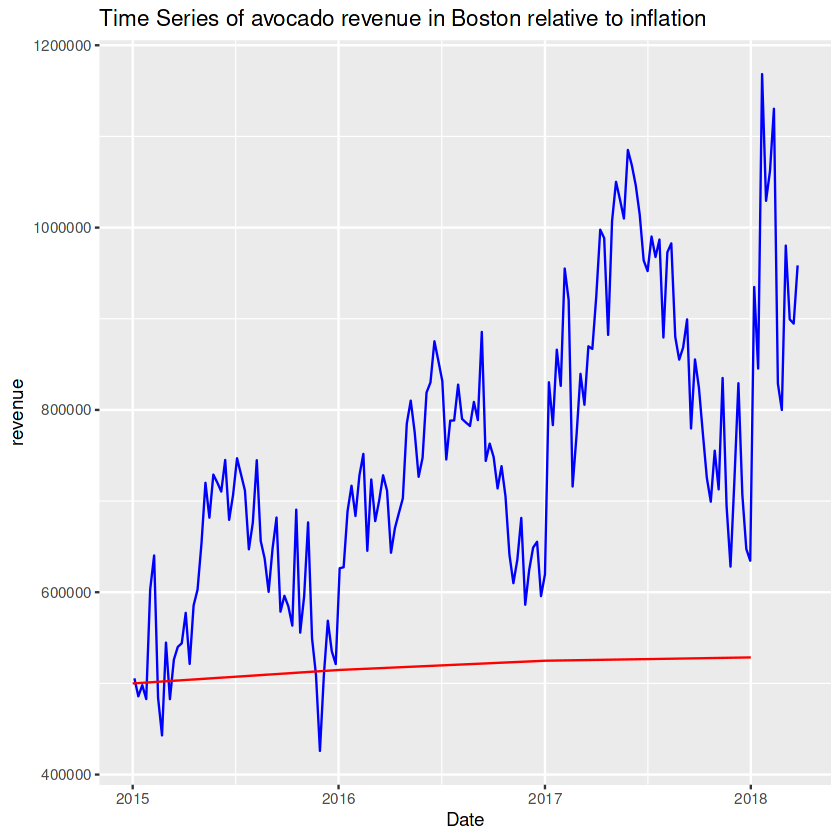

In [27]:

# Filter the data for region = 'Boston'
avocado_boston <- avocado %>% 
  filter(region == 'Boston')

avocado_boston$Date <- as.Date(avocado_boston$Date)

# Group by Date and calculate total revenue
total_revenue <- avocado_boston %>% 
  group_by(Date) %>% 
  summarise(revenue = sum(Total.Volume * AveragePrice))

# Create a data frame with inflation values for each year, I got the inflation numbers from macrotrends.net
inflation <- data.frame(
  year = c(2015, 2016, 2017, 2018),
  rate = c(0, 1.26, 2.13, 2.44)
)


# Create the plot
ggplot(data = total_revenue, aes(x = Date, y = revenue)) +
  geom_line(color = "blue") +
  labs(x = "Date", y = "revenue", title = "Time Series of avocado revenue in Boston relative to inflation") +
  geom_line(data = inflation, aes(x = as.Date(paste0(year, "-01-01")), y = max(total_revenue$revenue) * (1 + rate / 100) - (max(total_revenue$revenue) - 500000)), color = "red") 


#### interpretation: We can see from this plot that Avocando is doing increaslingly well in Boston and most of the increases in revenue can't be attributed to inflation. We can also see that the weather has a large impact on the revenue, during the warmer part of the year avocando tends to have a higher revenue.